In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime as dt

# ONION CRISIS 2019

## WHOLESALE VS AVERAGE WHOLESALE

In [2]:
dx=pd.read_csv('../../../Raw/lasalgaon_mandi.csv',header=None)

366 366 366


Text(0.5, 1.0, 'Mandi Price Vs Average Mandi Price')

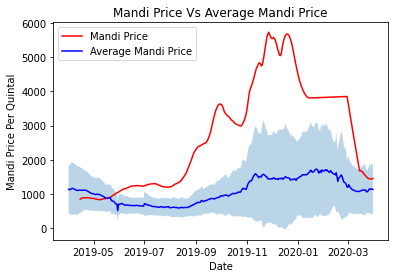

In [3]:
dx=pd.read_csv('../../../Raw/lasalgaon_mandi.csv',header=None)
dx.replace(0.0,np.nan,inplace = True)
dx[2].interpolate(method = 'linear',inplace=True)
dx.ffill(inplace = True)
dx.index = pd.DatetimeIndex(dx[0])
dx = dx[[2]]
dx.interpolate(method='linear')
dx_year = dx[(dx.index>'2019-03-31') &  (dx.index<='2020-03-31')]
dx_other = dx[(dx.index<='2019-03-31') |  (dx.index>'2020-03-31')]
dx_other=dx_other.interpolate(method='linear')
dx_year=dx_year.interpolate(method='linear')
dy_mean = dx_other.groupby([dx_other.index.month, dx_other.index.day]).mean()
dy_std = dx_other.groupby([dx_other.index.month, dx_other.index.day]).std()
dx_year=dx_year[dx_year.index<='2020-03-31']
print(len(dx_year),len(dy_mean),len(dy_std))
dx_year['average'] = dy_mean[2].tolist()
dx_year['std'] = dy_std[2].tolist()
plt.plot(dx_year[2].rolling(15).mean(),c = 'r')
plt.plot(dx_year['average'],c = 'b')
plt.fill_between(dx_year.index, dx_year['average'] - dx_year['std'], dx_year['average'] + dx_year['std'], alpha = 0.3)
plt.legend(['Mandi Price','Average Mandi Price'])
plt.xlabel('Date')
plt.ylabel('Mandi Price Per Quintal')
plt.title('Mandi Price Vs Average Mandi Price')

## RAINFALL

In [118]:
df = pd.read_csv('Maharashtra_full1.csv')

In [119]:
df_year = df[(df['Year']==2019) | (df['Year']==2020) ][['Year','Month','Average']]
df_year = df_year[3:]

In [120]:
df_other = df[(df['Year']!=2019) & (df['Year']!=2020)][['Year','Month','Average']]

In [121]:
mean_df = df_other.groupby(by='Month',as_index=False)['Average'].mean()
std_df = df_other.groupby(by='Month',as_index=False)['Average'].std()

In [122]:
mean_df=mean_df.apply(np.roll,shift=-3)

In [123]:
std_df=std_df.apply(np.roll,shift=-3)

In [124]:
df_year.reset_index(inplace=True)

In [125]:
dx=mean_df[['Average']]
dx['std']=std_df['Average']
dx['one']=df_year['Average']

In [126]:
dx['date'] = pd.date_range(start='03-31-2019', periods=len(dx), freq='M')

In [127]:
dx.index=pd.to_datetime(dx.date)

In [128]:
dx=dx.interpolate(method='linear')

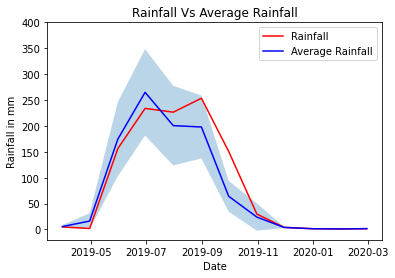

In [129]:
plt.fill_between(dx.index, dx['Average']-dx['std'], dx['Average']+dx['std'], alpha = 0.3)
plt.plot(dx['one'],color='r')
plt.plot(dx['Average'],color='b')
plt.legend(['Rainfall','Average Rainfall'])
plt.xlabel('Date')
plt.ylabel('Rainfall in mm')
plt.yticks(np.arange(0,450,50))
plt.title('Rainfall Vs Average Rainfall')
plt.show()

## RETAIL 

In [130]:
df=pd.read_csv('retailoniondata.csv',header=None)

In [131]:
df[2]=df[2]*100

In [132]:
df=df[(df[1]==44) & (df[0]>='2006-01-01') ]

In [133]:
df.drop_duplicates([0],inplace=True)

In [134]:
idx = pd.date_range('2006-01-01', '2020-03-31')
df.index = pd.DatetimeIndex(df[0])
df = df.reindex(idx, fill_value=0)

In [135]:
df=df[[2]]

In [136]:
df.replace(0.0,np.nan,inplace=True)

In [137]:
df_year=df[(df.index>='2019-04-01') &  (df.index<'2020-04-01')]

In [138]:
df_other=df[df.index<'2019-04-30']

In [139]:
df_other=df_other.interpolate(method='linear')
df_year=df_year.interpolate(method='linear')

In [140]:
dy_mean = df_other.groupby([df_other.index.month, df_other.index.day]).mean()
dy_std = df_other.groupby([df_other.index.month, df_other.index.day]).std()

In [141]:
df_year=df_year[df_year.index<'2020-04-30']

In [142]:
df_year['average'] = dy_mean[2].tolist()
df_year['std'] = dy_std[2].tolist()

Text(0.5, 1.0, 'Retail Price Vs Average Retail Price')

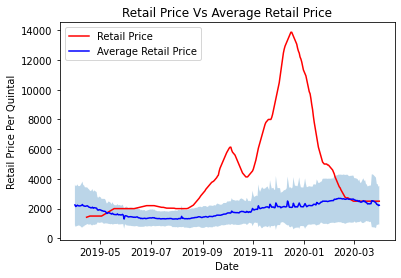

In [143]:
plt.plot(df_year[2].rolling(15).mean(),c='r')
plt.plot(df_year['average'],c='b')
plt.fill_between(df_year.index, df_year['average']-df_year['std'], df_year['average']+df_year['std'], alpha = 0.3)
plt.legend(['Retail Price','Average Retail Price'])
plt.xlabel('Date')
plt.ylabel('Retail Price Per Quintal')
plt.title('Retail Price Vs Average Retail Price')

<h2>  Retail - Mandi price

In [144]:
dx=pd.read_csv('../../../Raw/lasalgaon_mandi.csv',header=None)

In [145]:
dx.replace(0.0,np.nan,inplace=True)

In [146]:
dx[2].interpolate(method='linear',inplace=True)

In [147]:
dx.ffill(inplace=True)

In [148]:
df_year_retail=df_year[(df_year.index>'2019-04-01') & (df_year.index<'2020-04-01')][[2]]

In [149]:
l=(dx[(dx[0]>='2019-04-01') & (dx[0]<'2020-04-01')][2]).tolist()

In [150]:
df_year_retail['wholesale'] = l[:df_year_retail.shape[0]]

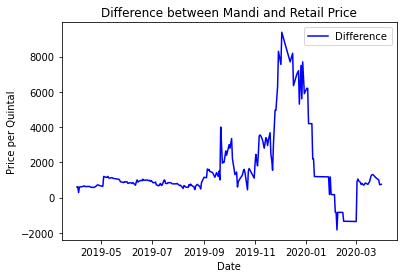

In [151]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(6, 4))

# Add x-axis and y-axis
ax.plot(df_year_retail.index.values,
       df_year_retail[2] - df_year_retail['wholesale'],
       color='b')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Price per Quintal",
       title="Difference between Mandi and Retail Price")

# Define the date format
date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
print(mdates.MonthLocator(interval=2))
# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1,bymonth=[3,5,7,9,11,1]))
# ax.set_xticklabels(labels=['2019-04','2019-05','2019-06', '2019-07','2019-08', '2019-09','2019-10', '2019-11','2019-12', '2020-01','2020-02','2020-03','2020-04','2020-05'])
plt.legend(['Difference'])
plt.show()

## RETAIL VS MANDI

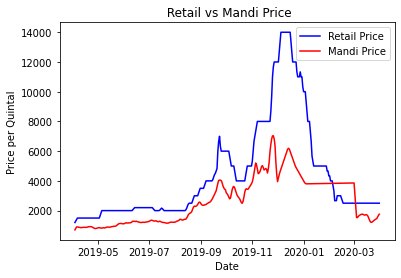

In [152]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(6, 4))

# Add x-axis and y-axis
ax.plot(df_year_retail.index.values,
       df_year_retail[2].rolling(3).mean() ,
       color='b')

ax.plot(df_year_retail.index.values,
       df_year_retail['wholesale'].rolling(3).mean(),
       color='r')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Price per Quintal",
       title=" Retail vs Mandi Price")

# Define the date format
date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1,bymonth=[3,5,7,9,11,1]))
plt.legend(['Retail Price','Mandi Price'])

plt.show()

## ARRIVAL VS AVERAGE ARRIVAL 

In [179]:
da=pd.read_csv('../../../Raw/lasalgaon_arrival.csv',header=None)

In [180]:
da.replace(0.0,np.nan,inplace=True)
da[2].interpolate(method='linear',inplace=True)
da.ffill(inplace=True)

In [181]:
da_year = da[(da[0]>='2019-04-01') & (da[0]<'2020-04-01') ][[0,2]]

In [182]:
da_other = da[da[0]<'2019-04-01'][[0,2]]

In [183]:
l=[]
for i in range(len(da_other)):
    x=da_other[0][i][5:]
    l.append(x)

In [184]:
da_other['month']=l

In [185]:
da_mean = da_other.groupby([da_other.month]).mean()
da_std = da_other.groupby([da_other.month]).std()

In [186]:
# da_mean=da_mean[da_mean.index!='02-29']
# da_std=da_std[da_std.index!='02-29']

In [187]:
da_year.shape, da_mean.shape, da_std.shape

((366, 2), (366, 1), (366, 1))

In [188]:
da_year['mean']=da_mean[2].tolist()[:da_year.shape[0]]
da_year['std']=da_std[2].tolist()[:da_year.shape[0]]

In [189]:
da_mean=da_mean[(da_mean.index<='01-31') | (da_mean.index>='04-01')] 
da_std=da_std[(da_std.index<='01-31') | (da_std.index>='04-01')] 

In [190]:
da_year.index=pd.to_datetime(da_year[0])

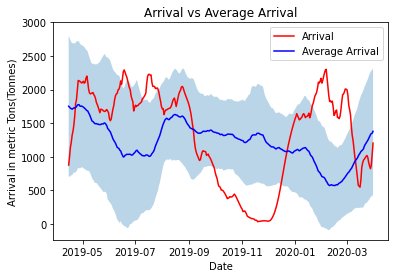

In [193]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(6, 4))

# Add x-axis and y-axis
ax.fill_between(da_year.index, (da_year['mean']-da_year['std']).rolling(15).mean(), (da_year['mean']+da_year['std']).rolling(15).mean(), alpha = 0.3)

ax.plot(da_year.index.values,da_year[2].rolling(15).mean(),color='r')
ax.plot(da_year.index.values,da_year['mean'].rolling(15).mean(),color='b')

# ax.plot(df_year_retail.index.values,
#        df_year_retail['wholesale'].rolling(3).mean(),
#        color='r')

# # Set title and labels for axes
# ax.set(xlabel="Date",
#        ylabel="Price per Quintal",
#        title=" Retail vs Mandi Price")

# Define the date format
date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1,bymonth=[3,5,7,9,11,1]))
plt.legend(['Retail Price','Wholesale Price'])
plt.legend(['Arrival','Average Arrival'])
plt.xlabel('Date')
plt.ylabel('Arrival in metric Tons(Tonnes)')
plt.title('Arrival vs Average Arrival')
plt.yticks(np.arange(0,3001,500))
plt.show()

# EFFECT OF DEMONETIZATION ON AGRICULTURE

In [295]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#import datetime as dt
from datetime import datetime as dt

### WHOLESALE VS AVERAGE WHOLESALE

In [195]:
dx=pd.read_csv('../../../Raw/lasalgaon_mandi.csv',header=None)
dx.replace(0.0,np.nan,inplace = True)
dx[2].interpolate(method = 'linear',inplace=True)
dx.ffill(inplace = True)
dx.index = pd.DatetimeIndex(dx[0])
dx = dx[[2]]
dx.interpolate(method='linear')
dx_year = dx[(dx.index>='2016-04-01') &  (dx.index<='2017-04-01')]
dx_other = dx[(dx.index<'2016-04-01') |  (dx.index>='2017-04-01')]
dx_other=dx_other.interpolate(method='linear')
dx_year=dx_year.interpolate(method='linear')
dy_mean = dx_other.groupby([dx_other.index.month, dx_other.index.day]).mean()
dy_std = dx_other.groupby([dx_other.index.month, dx_other.index.day]).std()
dx_year=dx_year[dx_year.index<='2020-03-31']

In [196]:
dx_year['average'] = dy_mean[2].tolist()
dx_year['std'] = dy_std[2].tolist()

Text(0.5, 1.0, 'Mandi Price Vs Average Mandi Price')

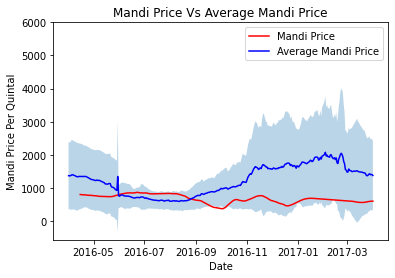

In [197]:
plt.plot(dx_year[2].rolling(15).mean(),c = 'r')
plt.plot(dx_year['average'],c = 'b')
plt.fill_between(dx_year.index, dx_year['average'] - dx_year['std'], dx_year['average'] + dx_year['std'], alpha = 0.3)
plt.legend(['Mandi Price','Average Mandi Price'])
plt.xlabel('Date')
plt.yticks(np.arange(0,6001,1000))
plt.ylabel('Mandi Price Per Quintal')
plt.title('Mandi Price Vs Average Mandi Price')

## RAINFALL

In [235]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime as dt

In [236]:
df = pd.read_csv('Maharashtra_full1.csv')

In [237]:
df_year = df[(df['Year']==2016) | (df['Year']==2017) ][['Year','Month','Average']]

In [239]:
df_year = df_year[3:-9]

In [240]:
df_other = df[(df['Year']!=2016) & (df['Year']!=2017)][['Year','Month','Average']]

In [241]:
mean_df = df_other.groupby(by='Month',as_index=False)['Average'].mean()
std_df = df_other.groupby(by='Month',as_index=False)['Average'].std()

In [242]:
mean_df=mean_df.apply(np.roll,shift=-3)

In [243]:
std_df=std_df.apply(np.roll,shift=-3)

In [244]:
df_year.reset_index(inplace=True)

In [245]:
dx=mean_df[['Average']]
dx['std']=std_df['Average']
dx['one']=df_year['Average']

In [246]:
dx['date'] = pd.date_range(start='03-31-2016', periods=len(dx), freq='M')

In [247]:
dx.index=pd.to_datetime(dx.date)

Text(0.5, 1.0, 'Rainfall Vs Average Rainfall')

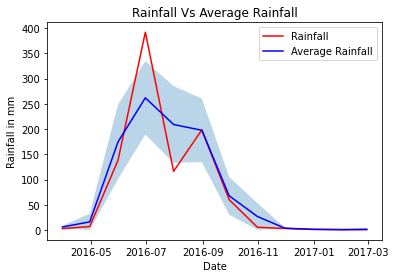

In [249]:
plt.fill_between(dx.index, dx['Average']-dx['std'], dx['Average']+dx['std'], alpha = 0.3)
plt.plot(dx['one'],color='r')
plt.plot(dx['Average'],color='b')
plt.legend(['Rainfall','Average Rainfall'])
plt.xlabel('Date')
plt.ylabel('Rainfall in mm')
plt.title('Rainfall Vs Average Rainfall')

## RETAIL 

In [250]:
df=pd.read_csv('retailoniondata.csv',header=None)

In [251]:
df[2]=df[2]*100

In [252]:
df=df[(df[1]==44) & (df[0]>='2006-01-01') ]

In [253]:
df.drop_duplicates([0],inplace=True)

In [254]:
idx = pd.date_range('2006-01-01', '2020-04-30')
df.index = pd.DatetimeIndex(df[0])
df = df.reindex(idx, fill_value=0)

In [255]:
df=df[[2]]

In [256]:
df.replace(0.0,np.nan,inplace=True)

In [257]:
df_year=df[(df.index>='2016-04-01') &  (df.index<'2017-04-01')]

In [258]:
df_other=df[df.index<'2016-04-30']

In [259]:
df_other=df_other.interpolate(method='linear')
df_year=df_year.interpolate(method='linear')

In [260]:
dy_mean = df_other.groupby([df_other.index.month, df_other.index.day]).mean()
dy_std = df_other.groupby([df_other.index.month, df_other.index.day]).std()

In [261]:
df_year=df_year[df_year.index<'2017-04-01']

In [262]:
df_year.shape , dy_mean.shape

((365, 1), (366, 1))

In [263]:
df_year['average'] = dy_mean[2].tolist()[:df_year.shape[0]]
df_year['std'] = dy_std[2].tolist()[:df_year.shape[0]]

Text(0.5, 1.0, 'Retail Price Vs Average Retail Price')

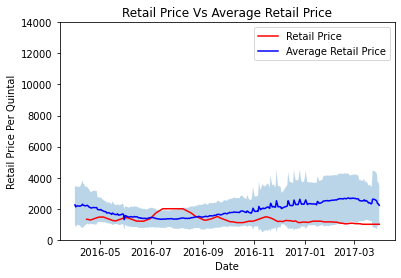

In [264]:
plt.plot(df_year[2].rolling(15).mean(),c='r')
plt.plot(df_year['average'],c='b')
plt.fill_between(df_year.index, df_year['average']-df_year['std'], df_year['average']+df_year['std'], alpha = 0.3)
plt.legend(['Retail Price','Average Retail Price'])
plt.xlabel('Date')
plt.yticks(np.arange(0,14001,2000))
plt.ylabel('Retail Price Per Quintal')
plt.title('Retail Price Vs Average Retail Price')

<h2>  Retail - Mandi price

In [269]:
dx=pd.read_csv('../../../Raw/lasalgaon_mandi.csv',header=None)

In [270]:
dx.replace(0.0,np.nan,inplace=True)

In [271]:
dx[2].interpolate(method='linear',inplace=True)

In [272]:
dx.ffill(inplace=True)

In [273]:
df_year_retail=df_year[(df_year.index>'2016-04-01') & (df_year.index<'2017-04-01')][[2]]

In [274]:
l=(dx[(dx[0]>='2016-04-01') & (dx[0]<'2017-04-01')][2]).tolist()

In [275]:
df_year_retail['wholesale'] = l[:df_year_retail.shape[0]]

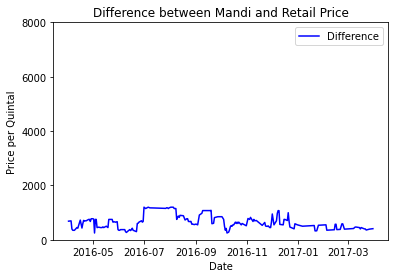

In [278]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(6, 4))

# Add x-axis and y-axis
ax.plot(df_year_retail.index.values,
       df_year_retail[2] - df_year_retail['wholesale'],
       color='b')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Price per Quintal",
       title="Difference between Mandi and Retail Price")

# Define the date format
date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1,bymonth=[3,5,7,9,11,1]))
plt.legend(['Difference'])
plt.yticks(np.arange(0,8001,2000))
plt.show()

## RETAIL VS MANDI

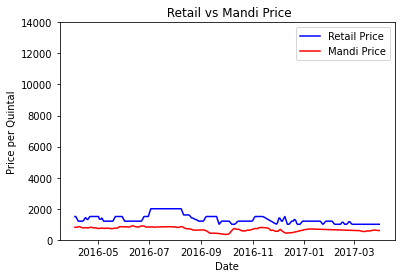

In [279]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(6, 4))

# Add x-axis and y-axis
ax.plot(df_year_retail.index.values,
       df_year_retail[2].rolling(3).mean() ,
       color='b')

ax.plot(df_year_retail.index.values,
       df_year_retail['wholesale'].rolling(3).mean(),
       color='r')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Price per Quintal",
       title=" Retail vs Mandi Price")

# Define the date format
date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1,bymonth=[3,5,7,9,11,1]))
plt.legend(['Retail Price','Mandi Price'])
plt.yticks(np.arange(0,14001,2000))
plt.show()

## ARRIVAL VS AVERAGE ARRIVAL 

In [282]:
da=pd.read_csv('../../../Raw/lasalgaon_arrival.csv',header=None)

In [283]:
da.replace(0.0,np.nan,inplace=True)
da[2].interpolate(method='linear',inplace=True)
da.ffill(inplace=True)

In [284]:
da_year = da[(da[0]>='2016-04-01') & (da[0]<'2017-04-01') ][[0,2]]

In [285]:
da_other = da[da[0]<'2016-04-01'][[0,2]]

In [286]:
l=[]
for i in range(len(da_other)):
    x=da_other[0][i][5:]
    l.append(x)

In [287]:
da_other['month']=l

In [288]:
da_mean = da_other.groupby([da_other.month]).mean()
da_std = da_other.groupby([da_other.month]).std()

In [289]:
da_mean=da_mean[da_mean.index!='02-29']
da_std=da_std[da_std.index!='02-29']

In [290]:
da_year['mean']=da_mean[2].tolist()[:da_year.shape[0]]
da_year['std']=da_std[2].tolist()[:da_year.shape[0]]

In [291]:
da_mean=da_mean[(da_mean.index<='01-31') | (da_mean.index>='04-01')] 
da_std=da_std[(da_std.index<='01-31') | (da_std.index>='04-01')] 

In [292]:
da_year.index=pd.to_datetime(da_year[0])

In [293]:
# plt.fill_between(da_year.index, da_year['mean']-da_year['std'], da_year['mean']+da_year['std'], alpha = 0.3)
# plt.plot(da_year[2],color='r')
# plt.plot(da_year['mean'],color='b')
# plt.legend(['Rainfall','Average Rainfall'])
# plt.xlabel('Date')
# plt.ylabel('Rainfall in mm')

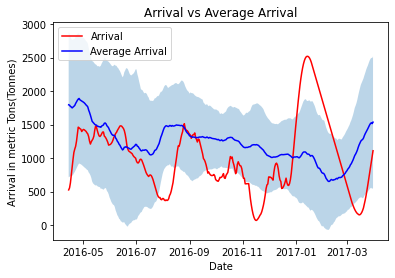

In [294]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(6, 4))

# Add x-axis and y-axis
ax.fill_between(da_year.index, (da_year['mean']-da_year['std']).rolling(15).mean(), (da_year['mean']+da_year['std']).rolling(15).mean(), alpha = 0.3)

ax.plot(da_year.index.values,da_year[2].rolling(15).mean(),color='r')
ax.plot(da_year.index.values,da_year['mean'].rolling(15).mean(),color='b')

# ax.plot(df_year_retail.index.values,
#        df_year_retail['wholesale'].rolling(3).mean(),
#        color='r')

# # Set title and labels for axes
# ax.set(xlabel="Date",
#        ylabel="Price per Quintal",
#        title=" Retail vs Mandi Price")

# Define the date format
date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1,bymonth=[3,5,7,9,11,1]))
plt.legend(['Retail Price','Wholesale Price'])
plt.legend(['Arrival','Average Arrival'])
plt.xlabel('Date')
plt.ylabel('Arrival in metric Tons(Tonnes)')
plt.title('Arrival vs Average Arrival')
plt.show()